In [14]:
#librairie necessaires
# nous nous sommes aidé du code : https://github.com/spmallick/learnopencv/tree/master/SVM-using-Python/Non-Linear-Data - spmallick

import numpy as np 
import matplotlib.pyplot as plt 
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV

In [15]:
#couleur des plots : jaune et bleu
cone_colors = [(1, 1, 0), (0, 0, 1)]

In [16]:
#fonction qui recupere les coordonnees dans les fichiers text
def read_points_file(filename):
  pts = []
  with open(filename, "r") as f:
    for pt in f:
      pt = pt.strip("\n").split()
      pts.append([float(pt[0]), float(pt[1])])
  return pts

In [17]:
def read_data(class_0_file, class_1_file):
  pts_0 = read_points_file(class_0_file)
  pts_1 = read_points_file(class_1_file)

  x = pts_0 + pts_1
  labels = [0] * len(pts_0) + [1] * len(pts_1)
  x = np.array(x)
  return (x, labels)

In [18]:
def get_colors(y):
  return [cone_colors[item] for item in y]

In [19]:
def plot_decision_function(X_train, y_train, X_test, y_test, clf):
  plt.figure(figsize=(8, 4), dpi=150)
  plt.subplot(121)
  plt.title("Training data")
  plot_decision_function_helper(X_train, y_train, clf)
  plt.subplot(122)
  plt.title("Test data")
  plot_decision_function_helper(X_test, y_test, clf, True)
  plt.show()

In [20]:
def plot_decision_function_helper(X, y, clf, show_only_decision_function = False):
  
  colors = get_colors(y)
  plt.axis('equal')
  plt.tight_layout()

  print(colors)
  plt.scatter(X[:, 0], X[:, 1], c = colors, s = 10, edgecolors=colors)
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # Create grid to evaluate model
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = clf.decision_function(xy).reshape(XX.shape)

 
  # Plot decision boundary
  ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
             linestyles=['-'])
    

In [21]:
def plot_trajectoire(X,y,clf,title):
  plt.figure(figsize=(8, 4), dpi=100)
  plt.subplot(122)
  plt.title(title)
  plot_decision_function_helper(X_test, y_test, clf, True)
  plt.show()  

[(1, 1, 0), (0, 0, 1), (0, 0, 1), (1, 1, 0), (0, 0, 1), (0, 0, 1), (1, 1, 0), (0, 0, 1), (1, 1, 0), (0, 0, 1), (1, 1, 0), (0, 0, 1), (0, 0, 1), (0, 0, 1), (1, 1, 0), (1, 1, 0), (1, 1, 0), (0, 0, 1), (1, 1, 0), (1, 1, 0), (0, 0, 1), (0, 0, 1), (1, 1, 0), (0, 0, 1), (1, 1, 0), (0, 0, 1), (0, 0, 1), (0, 0, 1), (0, 0, 1), (1, 1, 0), (1, 1, 0), (1, 1, 0), (0, 0, 1), (0, 0, 1), (1, 1, 0), (0, 0, 1), (0, 0, 1), (1, 1, 0), (1, 1, 0), (0, 0, 1)]


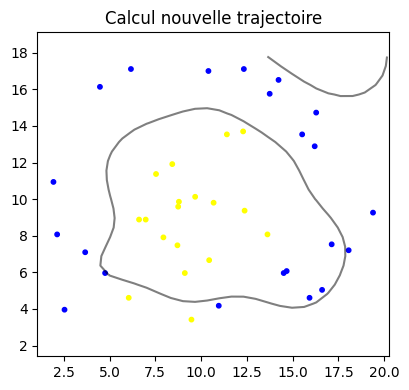

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs parametres:
 SVC(C=1, gamma=0.01)
[(1, 1, 0), (0, 0, 1), (0, 0, 1), (1, 1, 0), (0, 0, 1), (0, 0, 1), (1, 1, 0), (0, 0, 1), (1, 1, 0), (0, 0, 1), (1, 1, 0), (0, 0, 1), (0, 0, 1), (0, 0, 1), (1, 1, 0), (1, 1, 0), (1, 1, 0), (0, 0, 1), (1, 1, 0), (1, 1, 0), (0, 0, 1), (0, 0, 1), (1, 1, 0), (0, 0, 1), (1, 1, 0), (0, 0, 1), (0, 0, 1), (0, 0, 1), (0, 0, 1), (1, 1, 0), (1, 1, 0), (1, 1, 0), (0, 0, 1), (0, 0, 1), (1, 1, 0), (0, 0, 1), (0, 0, 1), (1, 1, 0), (1, 1, 0), (0, 0, 1)]


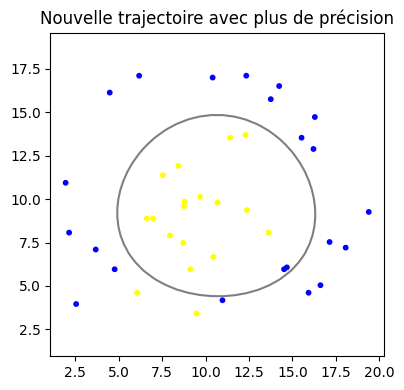

In [22]:
# Read data
x, labels = read_data("points_class_0.txt", "points_class_1.txt")

# Split data to train and test on 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size = 0.2, random_state=0)


# make a classifier
clf = svm.SVC(C = 10.0, kernel='rbf', gamma=0.1)

# Train classifier
clf.fit(X_train, y_train)

# Make predictions on unseen test data
clf_predictions = clf.predict(X_test)

#on trace la courbe
plot_trajectoire(X_test, y_test, clf,"Calcul nouvelle trajectoire")


# Grid Search
# Parameter Grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}
# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)
# Train the classifier
clf_grid.fit(X_train, y_train)
# meilleur params
print("Meilleurs parametres:\n", clf_grid.best_estimator_)


# On trace la courbe avec un meilleur parametre
plot_trajectoire(X_test, y_test, clf_grid,"Nouvelle trajectoire avec plus de précision")

